# Análise Exploratória de Dados - Transações de uma padaria
#### *(Exploratory Data Analaysis - Transactions from a Bakery)*

### Introdução
A **Análise Exploratória de Dados** é uma parte importante dos projetos em Data Science.

É nesta etapa que buscamos conhecer mais a fundo os dados com que estamos trabalhando. Durante o processo, entendemos melhor o nosso dataset, estudamos as variáveis e procuramos pontos importantes que possam nos ajudar na resolução do problema que estamos tentando resolver.

Com o intuito de incrementar meu aprendizado, decidi realizar este pequeno projeto de análise exploratória utilizando um dataset bem simples das transações de uma padaria. Esse dataset pode ser encontrado no Kaggle (Kaggle é um site de competições, aprendizado e projetos em Data Science).

Você pode acessá-lo através do link abaixo ou no próprio repositório deste projeto:

- https://www.kaggle.com/xvivancos/transactions-from-a-bakery
- https://github.com/hugotrigueiro/Dataset-Transactions-from-a-Bakery-Exploratory-Data-Analysis-

Feito isso, ainda falta conhecer o básico do nosso dataset. **Vamos lá!**

### Dicionário do Dataset

Antes de iniciarmos o projeto, precisamos entender os dados que ele nos trás. Esse arquivo, possui 4 colunas,vamos dar uma olhada no **dicionário** do nosso dataset para entendê-las:

- **Variável categórica (Data):** nos diz a data das transações no formato (AAAA-MM-DD). A coluna inclui datas de 30/10/2016 até 09/04/2017.

- **Variável categórica (Hora):** nos diz a hora das transações.
    

- **Variável quantitativa (Transação):** nos permite diferenciar as transações. As linhas que compartilham o mesmo valor neste campo pertencem a mesma transação, é por isso que o dataset tem menos transações do que observações.


- **Variável categórica (Item):** são os próprios produtos.

### Objetivos

Apesar da análise exploratória ser uma etapa justamente de exploração, muitos projetos envolvem exatamente apenas esta etapa. Mas o que isso significa? Significa que existem muitos projetos especificamente de análise exploratória de dados, onde você trabalha e explora os dados com o objetivo de responder perguntas e resolver problemas, isto é, nem todo projeto de Data Science envolve Machine Learning, Deep Learning, entre outros processos.

Muitas vezes o que precisamos para responder nossas perguntas, é apenas uma boa manipulação, visualização e análise dos dados.

Ok, ainda que o dataset que estamos trabalhando aqui seja bem simples, podemos colocar algumas pequenas perguntas para tentarmos responder e assim guiar um pouco melhor a nossa análise.

Portanto, com base nas variáveis que conhecemos no dicionário acima, vamos estabelecer algumas questões básicas a serem respondidas durante o projeto.

Vamos dividir as perguntas em duas categorias (Transações e Itens). Estas questões serão:
* #### TRANSAÇÕES:
    - Qual o número total de transações?
    - Qual o número médio de transações diárias?
    - Existe algum padrão dessas transações ao longo do período?
    - Qual o número de transações em cada mês?
    - Quais os horários de maior movimento de transações durante o período?
    - Qual o número médio de transações por hora?



* #### ITENS:
    - Quais os itens **mais** comprados durante o período de registro dessas transações?
    - Quais os itens **menos** comprados durante o período de registro dessas transações?
    - Existe algum padrão nas transações de algum item específico?
    
Pronto! Agora estamos finalmente preparador para dar início ao projeto. **Vamos lá!**

___

## Projeto Análise Exploratória de Dados - Transações de uma Padaria:

### Ajustando as Ferramentas

Antes de começar a manipular os dados, precisamos preparar as ferramentas que vamos usar, concorda?

Neste projeto, vamos precisar de 3 bibliotecas, são elas:
- **Pandas** (biblioteca que usaremos para a manipulação dos dados)
- **Matplotlib** (biblioteca que usaremos para a criação, customização e visualização de gráficos)
- **Seaborn** (biblioteca que ajudará a deixar os gráficos do Matplotlib com uma estética mais agradável)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Este comando '%matplotlib inline' é específico do Jupyter Notebook, ele serve para que o plot dos gráficos do Matplotlib aconteça dentro do próprio Jupyter, sem a necessidade de abrir uma nova janela para isso.

### Importando o Dataset

Importados os pacotes, precisamos também importar o nosso dataset. Aqui, estamos utilizando o dataset em formato CSV.

Portanto, para fazer isso, vamos usar a função pd.read_csv() do Pandas, armazenar a leitura do dataset em uma variável e em seguida usar o método .head() para visualizar parcialmente os dados e checarmos se está tudo ok.

In [39]:
dataset = pd.read_csv('BreadBasket_DMS.csv')

In [40]:
dataset.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


Bom, já importamos o nosso dataset e já estamos pronto para comerçarmos a responder as perguntas que colocamos no começo do projeto. Vamos lá!

### PERGUNTAS - TRANSAÇÕES

- #### Qual o número total de transações?

Como vimos no pequeno preview que o método .head() nos dá dos nossos dados, já verificamos que as datas se repetem. Isso mostra que o nosso dataset está segmentado pelos itens. Cada transação carrega alguns itens que são registrados na coluna 'Item', já a coluna 'Transaction' armazena justamente uma espécie de ID da transação, onde os valores iguais representam uma mesma transação.

Temos ainda a coluna 'Time' que registra a hora, minutos e segundos de quando a transação foi feita. Os valores desta coluna também se repetem pois se tratam da mesma transação.

Assim, para sabermos a quantidade total de doações precisamos unificar os registros duplicados. Portanto, vamos criar um novo dataframe para fazer isso.

In [41]:
data = pd.DataFrame()

Pronto, dataframe criado. Agora, futuramente vamos precisar responder outras perguntas também, então precisamos criar esse novo dataframe já preparado para isso.

Vamos unificar todas as datas e calcular o número total de transações por dia, assim poderemos calcular valores das transações e segmentar melhor esse dataframe. Para isso vamos usar o método .unique() e pegar apenas os valores únicos da coluna 'Date'.

In [42]:
dataset['Date'].unique()

array(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02',
       '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06',
       '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
       '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
       '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
       '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22',
       '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
       '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
       '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
       '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
       '2016-12-09', '2016-12-10', '2016-12-11', '2016-12-12',
       '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
       '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
       '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', '2017-01-01', '2017-01-03', '2017-

O método separou todos os valores únicos em um array. Vamos adicioná-los ao nosso novo dataframe com uma coluna também chamada 'Date' e vamos ver se está tudo ok.

In [43]:
data['Date'] = pd.Series(dataset['Date'].unique())

In [44]:
data.head()

,Date
0,2016-10-30
1,2016-10-31
2,2016-11-01
3,2016-11-02
4,2016-11-03


Pronto! A coluna de datas está ok e será ela que irá segmentar o resto dos outros dados. Vamos agora unificar as trasanções, contabilizar a quantidade delas em cada data e criar uma nova coluna com estes dados.

Para isso, criaremos uma lista vazia que receberá essas transações realizaremos um loop for. Este loop vai passar por cada **data** do nosso novo dataframe, onde cada um delas, irá segmentar o nosso dataset. Assim, cada data segmentará o dataset inicial com apenas as transações daquele dia, então selecionamos a coluna de transações, unificamos todos os valores com o método.unique(), contabilizamos a quantidade com o método .size e finalmente armazenamos o valor na variável **transactions**.

Por fim, adicionaremos esses valores com o método .append a nossa lista vazia criada e adicionamos ao nosso dataframe essa lista como uma nova coluna chamada 'Number of Transactions'. 

In [71]:
number_of_transactions = []

for date in data['Date']:
    transactions = dataset.loc[dataset['Date'] == date]['Transaction'].unique().size
    number_of_transactions.append(transactions)
    
data['Number of Transactions'] = pd.Series(number_of_transactions)

In [72]:
data.head()

,Date,Number of Transactions
0,2016-10-30,79
1,2016-10-31,96
2,2016-11-01,77
3,2016-11-02,83
4,2016-11-03,95


Agora sim! Já temos um novo dataset organizado por dia e agora precisamos de apenas um pequeno comando para respondermos a nossa primeira pergunta, que é:

Qual o número total de transações?

Bom, para chegarmos a nossa solução, basta selecionarmos a coluna com o número de transações por dia e usar o método .sum() para tomar todos os valores e assim verificarmos o total de transações.

In [89]:
data['Number of Transactions'].sum()

9531

**Qual o número total de transações?**

**Resposta:** 9531 transações

___

- #### Qual o número médio de transações diárias?

Bom, com o nosso novo dataset já organizado, responder a essa segunda pergunta ficou mais fácil. Poderíamos calcular o número médio de doações por dia utilizando o método de soma e dividindo pelo total de registros, já que cada registro equivale a um dia.

Mas, existe um jeito mais fácil de fazer isso através do método .describe() do Pandas. Esse método já faz esse trabalho para nós e ainda fornece informações extras que também podem ser úteis. Vamos aplicá-lo e responder a essa pergunta.

In [95]:
data['Number of Transactions'].describe()

count    159.000000
mean      59.943396
std       18.980085
min        1.000000
25%       47.000000
50%       56.000000
75%       70.000000
max      139.000000
Name: Number of Transactions, dtype: float64

Legal! Olha quantas informações! O método .describe() oferece um pequeno resumo estatístico da série ou dataframe que passamos a ele. Na coluna de transações, ele nos indicou algumas informações interessantes como:
- Quantos registros existem (count): 159
- Média de registros (mean): 59.94
- Desvio Padrão (std): 18.98
- Menor valor (min): 1
- Maior valor (max): 139

Como descrimos a média através do .describe(), basta respondermos a pergunta. 

**Obs:** vamos arredondar o valor para ficar mais limpo.

**Qual o número médio de transações diárias?**

**Resposta:** 60 transações em média diariamente

___

- #### Existe algum padrão dessas transações ao longo do período?

Vamos plotar em um gráfico a quantidade de transações por dia e verificar um pouco do comportamento desta variável.

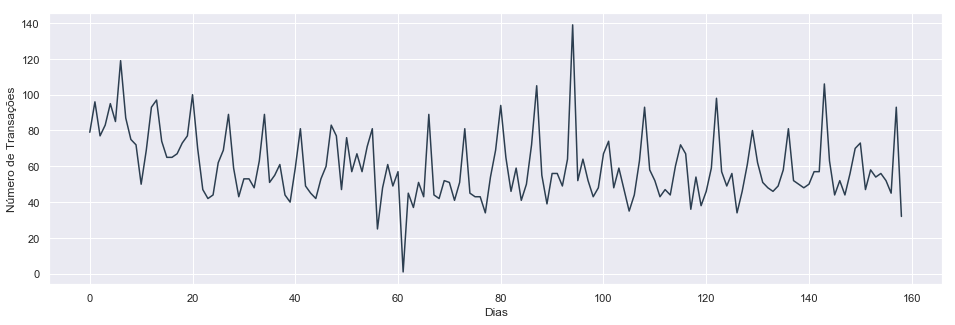

In [180]:
plt.figure(1, figsize=(16, 5))
plt.plot(data['Date'], data['Number of Transactions'], color='#2c3e50')
plt.xscale('linear')
plt.xlabel('Dias')
plt.ylabel('Número de Transações')
plt.show()

Bom, olhando o gráfico acima não vemos nenhum tipo de tendência marcante, correto? O gráfico não está crescendo e nem decrescendo de forma acentuada ao londo do período. Porém, ainda sim contém muitas oscilações.

É possível perceber que ele começa em uma tendência de queda até mais ou menos o valor 60 no eixo x, e depois retorna o crescimento e fica horizontal no resto do período.

Contudo é possível perceber um certo padrão de oscilações menores. Você consegue ver? Ainda que em uma tendência geral o gráfico esteja "andando de lado", há muitas variações entre picos e quedas na variável.

Precisamos lembrar que cada unidade no eixo x equivale a um dia e aqui fica a nossa primeira hipótese:

Por esta ser a variável de transações de uma padaria, precisamos nos perguntar se essa padaria funciona todos os dias, correto?

Ela até pode funcionar, mas sabemos que aos finais de semana, especialmente aos domingos, o movimento pode ser menor, o que representa essa constante variação de picos e quedas mais acentuadas.

Portanto, ainda que ao longo de todo período as transações não sigam uma grande tendência, podemos verificiar se existe realmente essa sazonalidade nas transações durante os dias da semana.

**Então, este será o nosso desafio: verificar se os picos e quedas acentuadas no número de transações é afetado pelos dias da semana.**

Vamos pular o resto das perguntas da categoria Transações pois para continuarmos vamos precisar transformar nosso dataframe de análise novamente. Então, vamos para as perguntas da categoria Itens, pois podemos continuar usando o dataframe que criamos.

___

- #### Quais os itens mais comprados durante o período de registro dessas transações?

In [11]:
for i in dataset['Item'].value_counts().index:
    data[i] = pd.Series()

In [12]:
x = 0
for date in data['Date']:  
    result = dataset.loc[dataset['Date'] == date]['Item'].value_counts()
    for index in result.index:
        data.loc[data[index].index == x, index] = result[index]
    x = x + 1

In [13]:
data.isnull().sum().sort_values(ascending=False)

Adjustment                       158
Siblings                         158
Tshirt                           158
Postcard                         158
Pintxos                          158
Caramel bites                    158
Hack the stack                   158
The BART                         158
Olum & polenta                   158
Gift voucher                     158
Polenta                          158
Bacon                            158
Raw bars                         158
Chicken sand                     158
Bowl Nic Pitt                    157
Spread                           157
Chimichurri Oil                  157
Tacos/Fajita                     157
Bread Pudding                    157
Fairy Doors                      157
Crepes                           156
Basket                           156
Empanadas                        156
Brioche and salami               156
Panatone                         156
Cherry me Dried fruit            156
Raspberry shortbread sandwich    156
H

In [14]:
data.head()

,Date,Number of Transactions,Coffee,Bread,Tea,Cake,Pastry,NONE,Sandwich,Medialuna,...,Fairy Doors,Bowl Nic Pitt,Olum & polenta,Gift voucher,Polenta,Chicken sand,Raw bars,Bacon,The BART,Adjustment
0,2016-10-30,79,33.0,29.0,12.0,1.0,6.0,10.0,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2016-10-31,96,60.0,24.0,19.0,5.0,13.0,6.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-01,77,38.0,21.0,19.0,6.0,14.0,4.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-11-02,83,42.0,17.0,14.0,NaN,16.0,5.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-11-03,95,40.0,26.0,9.0,6.0,18.0,6.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cl_data = data.fillna(0)

In [16]:
cl_data.head()

,Date,Number of Transactions,Coffee,Bread,Tea,Cake,Pastry,NONE,Sandwich,Medialuna,...,Fairy Doors,Bowl Nic Pitt,Olum & polenta,Gift voucher,Polenta,Chicken sand,Raw bars,Bacon,The BART,Adjustment
0,2016-10-30,79,33.0,29.0,12.0,1.0,6.0,10.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-10-31,96,60.0,24.0,19.0,5.0,13.0,6.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-01,77,38.0,21.0,19.0,6.0,14.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-11-02,83,42.0,17.0,14.0,0.0,16.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-11-03,95,40.0,26.0,9.0,6.0,18.0,6.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
dataset['Item'].value_counts()[0:15]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Name: Item, dtype: int64

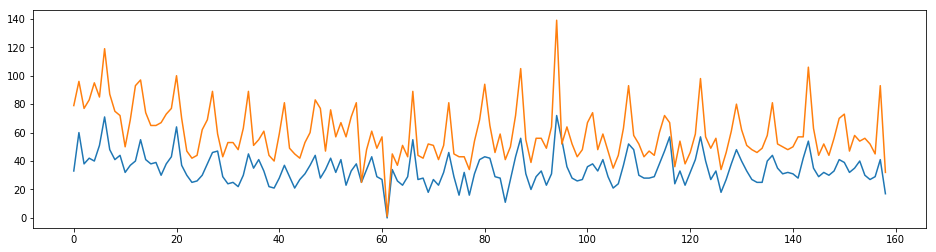

In [18]:
plt.figure(1, figsize=(16, 4))
plt.plot(cl_data['Date'], cl_data['Coffee'], cl_data['Number of Transactions'])
plt.xscale('linear')
plt.show()

In [19]:
dataset['Item'].value_counts()[-61:-1]

The Nomad                        58
Vegan mincepie                   54
Focaccia                         54
Bakewell                         48
Tartine                          47
Afternoon with the baker         44
Art Tray                         38
Extra Salami or Feta             38
Eggs                             28
Granola                          28
Tshirt                           21
My-5 Fruit Shoot                 18
Ella's Kitchen Pouches           17
Vegan Feast                      16
Crisps                           14
Valentine's card                 13
Dulce de Leche                   13
Duck egg                         12
Pick and Mix Bowls               12
Kids biscuit                     12
Tacos/Fajita                     11
Christmas common                 11
Mighty Protein                   11
Postcard                         10
Chocolates                       10
Gingerbread syrup                 9
Nomad bag                         8
Muesli                      

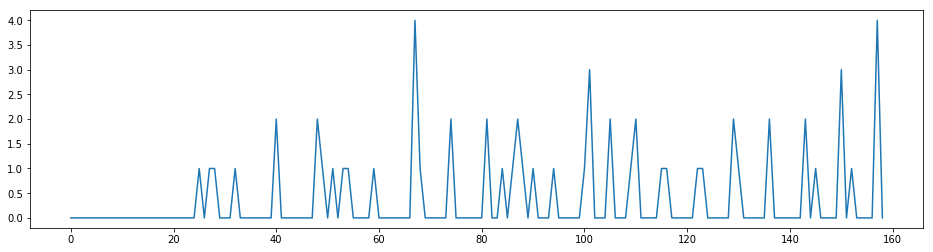

In [20]:
plt.figure(1, figsize=(16, 4))
plt.plot(cl_data['Date'], cl_data['The Nomad'])
plt.xscale('linear')
plt.show()

In [21]:
cl_data[dataset['Item'].value_counts()[0:15].index]

,Coffee,Bread,Tea,Cake,Pastry,NONE,Sandwich,Medialuna,Hot chocolate,Cookies,Brownie,Farm House,Muffin,Alfajores,Juice
0,33.0,29.0,12.0,1.0,6.0,10.0,0.0,11.0,4.0,2.0,0.0,2.0,12.0,0.0,3.0
1,60.0,24.0,19.0,5.0,13.0,6.0,3.0,2.0,1.0,9.0,0.0,9.0,17.0,0.0,6.0
2,38.0,21.0,19.0,6.0,14.0,4.0,3.0,2.0,2.0,7.0,0.0,1.0,3.0,4.0,2.0
3,42.0,17.0,14.0,0.0,16.0,5.0,2.0,0.0,1.0,6.0,0.0,10.0,1.0,10.0,8.0
4,40.0,26.0,9.0,6.0,18.0,6.0,6.0,9.0,3.0,6.0,8.0,10.0,0.0,9.0,3.0
5,51.0,30.0,14.0,1.0,6.0,5.0,3.0,8.0,4.0,4.0,17.0,3.0,0.0,6.0,3.0
6,71.0,36.0,12.0,11.0,4.0,8.0,2.0,16.0,12.0,3.0,31.0,5.0,0.0,0.0,0.0
7,48.0,23.0,17.0,6.0,15.0,6.0,1.0,5.0,10.0,0.0,2.0,8.0,9.0,14.0,2.0
8,41.0,27.0,12.0,0.0,8.0,1.0,2.0,10.0,1.0,3.0,0.0,3.0,13.0,4.0,0.0
9,44.0,5.0,11.0,0.0,9.0,1.0,5.0,7.0,5.0,2.0,8.0,10.0,5.0,8.0,1.0


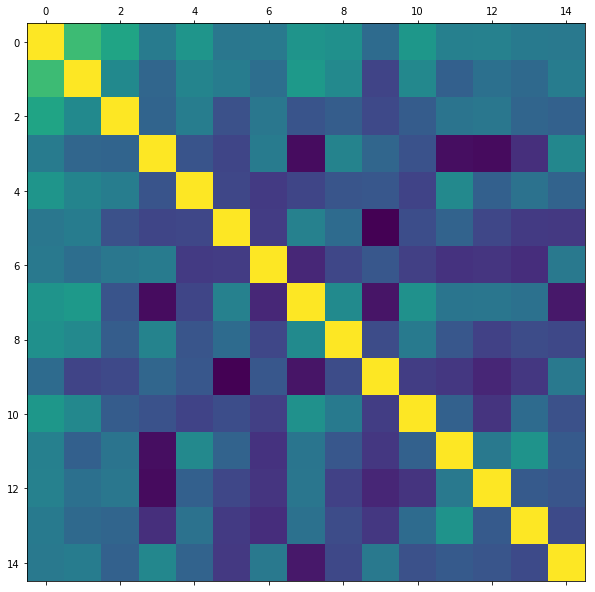

In [22]:
plt.figure(1, figsize=(10,10))
plt.matshow(cl_data[dataset['Item'].value_counts()[0:15].index].corr(), fignum=1)
plt.grid(False)
plt.show()

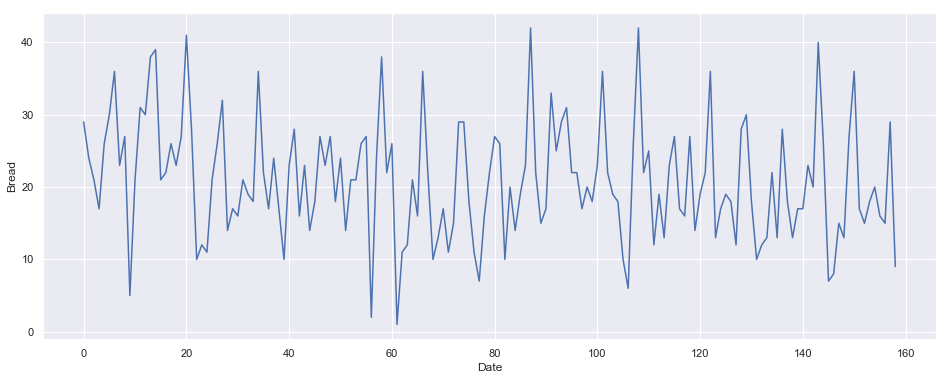

In [158]:
sns.set(style="darkgrid")
plt.figure(1, figsize=(16, 6))
sns.lineplot(x="Date", y="Bread", data=cl_data)
plt.xscale('linear')
sns.set()